<a href="https://colab.research.google.com/github/souravs17031999/Projects-kaggle-problems-60daysofudacity/blob/master/dog_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/sample_dog_output.png?raw=1)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
!wget -c https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip

--2019-12-22 13:55:05--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.216
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  73.0MB/s    in 15s     

2019-12-22 13:55:21 (70.5 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]



In [2]:
!wget -c https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip

--2019-12-22 13:55:23--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.112.200
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.112.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 196739509 (188M) [application/zip]
Saving to: ‘lfw.zip’

lfw.zip             100%[===================>] 187.62M  65.2MB/s    in 2.9s    

2019-12-22 13:55:26 (65.2 MB/s) - ‘lfw.zip’ saved [196739509/196739509]



In [0]:
!unzip -qq dogImages.zip
!mv dogImages dog_images
!unzip -qq lfw.zip

In [4]:
!wget https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_alt.xml

--2019-12-22 13:55:53--  https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_alt.xml
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘haarcascade_frontalface_alt.xml’

haarcascade_frontal     [  <=>               ]   6.02M  19.0MB/s    in 0.3s    

2019-12-22 13:55:55 (19.0 MB/s) - ‘haarcascade_frontalface_alt.xml’ saved [6312855]



In [5]:
!wget https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_eye.xml

--2019-12-22 13:55:56--  https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘haarcascade_eye.xml’

haarcascade_eye.xml     [ <=>                ]   3.04M  15.3MB/s    in 0.2s    

2019-12-22 13:55:57 (15.3 MB/s) - ‘haarcascade_eye.xml’ saved [3186269]



In [6]:
!wget https://github.com/opencv/opencv/blob/master/data/lbpcascades/lbpcascade_frontalface.xml

--2019-12-22 13:55:59--  https://github.com/opencv/opencv/blob/master/data/lbpcascades/lbpcascade_frontalface.xml
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘lbpcascade_frontalface.xml’

lbpcascade_frontalf     [ <=>                ] 447.51K  --.-KB/s    in 0.07s   

2019-12-22 13:56:00 (6.19 MB/s) - ‘lbpcascade_frontalface.xml’ saved [458252]



In [7]:
!wget https://github.com/opencv/opencv/blob/master/data/hogcascades/hogcascade_pedestrians.xml

--2019-12-22 13:56:04--  https://github.com/opencv/opencv/blob/master/data/hogcascades/hogcascade_pedestrians.xml
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘hogcascade_pedestrians.xml’

hogcascade_pedestri     [ <=>                ]   1.05M  --.-KB/s    in 0.1s    

2019-12-22 13:56:05 (8.24 MB/s) - ‘hogcascade_pedestrians.xml’ saved [1097986]



In [85]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [0]:
!mkdir haarcascades

In [0]:
!mv haarcascade_frontalface_alt.xml haarcascades

In [0]:
!mv haarcascade_eye.xml haarcascades

In [0]:
!mv lbpcascade_frontalface.xml haarcascades

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


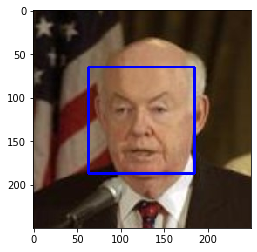

In [86]:
import random
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# load color (BGR) image
# loading random image from human images folder 'lfw'
img = cv2.imread(human_files[random.randint(0, 13222)]) 
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [87]:
faces

array([[ 63,  65, 122, 122]], dtype=int32)

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [0]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

performace on human images : 100.0 %    

performance on dog images : 53.0 %

In [89]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
counter_human = 0
counter_dog = 0
for i in range(100):
  if face_detector(human_files_short[i]):
    counter_human += 1
  if face_detector(dog_files_short[i]):
    counter_dog += 1
print(f"performace of Dog detector")
print(f"performace on human images : {(counter_human/100)*100} %")
print(f"performance on dog images : {(counter_dog/100)*100} %")

performace of Dog detector
performace on human images : 100.0 %
performance on dog images : 53.0 %


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

### Here, I try to use cascade classifiers to detect face with eyes combined in a single frame

In [0]:
# define eyes_cascade according to opencv 
eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

In [0]:
# function to detect the faces and then draw a rectangle around the face detected and then circle for eyes 
def detect_face(img_path):
  img = cv2.imread(img_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # detect faces 
  faces = face_cascade.detectMultiScale(gray)
  for (x, y, w, h) in faces:
    # drawing a rectangle (bounding box) around the detected area 
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    faceROI = gray[y:y+h,x:x+w]
    # detect eyes 
    eyes = eyes_cascade.detectMultiScale(faceROI)
    for (x2,y2,w2,h2) in eyes:
      # calculate the center of detected eye 
      eye_center = (x + x2 + w2//2, y + y2 + h2//2)
      # draw circle with the calculated center 
      radius = int(round((w2 + h2)*0.25))
      # associate the circle with the same frame as the rectangle 
      cv2.circle(img, eye_center, radius, (255, 0, 0 ), 4)
    
    # display the image, along with bounding box
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()


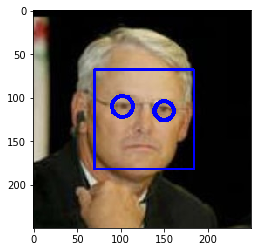

In [17]:
detect_face(human_files[13223])

### We can try out other classifiers (pretrained like local binary patterns(lbp), Histogram of oriented gradients (HOG) etc.

In [0]:
face_cascade_lbp = cv2.CascadeClassifier("lbpcascade_frontalface.xml")

In [0]:
def detect_face_lbps(img_path):
  img = cv2.imread(img_path)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = face_cascade_lbp.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)
  print(faces)


In [0]:
detect_face_lbps(human_files[1])

### HOG DESCRIPTOR !

In [0]:
hog = cv2.HOGDescriptor()

In [0]:
img = cv2.imread(human_files[100])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# detect people in the image
h = hog.compute(img)
(rects, weights) = hog.detectMultiScale(gray, winStride=(4, 4), padding=(8, 8), scale=1.05)

# for some reason due to path problem, i couldn't try this out but this will be resolved by setting path of cascade classifiers.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [0]:
import torch
import torchvision.models as models

In [95]:
# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:09<00:00, 60.1MB/s]


In [0]:
# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [0]:
from PIL import Image
import torchvision.transforms as transforms
import torchvision
# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    file = img_path

    # opening file and convert to RGB
    file = Image.open(file).convert('RGB')
    # defining transforms 
    transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
    ])
    # print('Transforming your image...')
    # transforming the image 
    img = transform(file).unsqueeze(0)
    # setting the device if cuda enabled 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    index = None
    # switching off all dropouts and batchnorm 
    VGG16.eval()
    # deactivate autograd engine 
    with torch.no_grad():
      # print('Passing your image to the model....')
      out = VGG16(img.to(device))
      ps = torch.exp(out)
      top_p, top_class = ps.topk(1, dim=1)
      index = top_class.item()  
    return index # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [0]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    index = VGG16_predict(img_path)
    return True if index in range(151, 269) else False 

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

performace on dog images = 100.0 %   

performace on human images = 2.0 %

In [99]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
# performance check on dog and human images 
count_dog = 0
count_human = 0
for i in range(100):
  if dog_detector(human_files_short[i]):
    count_human += 1
  if dog_detector(dog_files_short[i]):
    count_dog += 1  

print("performace of dog detector based on VGG16")
print(f"performace on dog images = {(count_dog/100)*100} %")
print(f"performace on human images = {(count_human/100)*100} %")

performace of dog detector based on VGG16
performace on dog images = 100.0 %
performace on human images = 2.0 %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [0]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

### Trying out ResNet-50

In [13]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.')
else:
    print('CUDA is available!')

CUDA is available!


In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 96.7MB/s]


In [0]:
model.to(device);

In [0]:
def RESNET50_predict(img_path):
    '''
    Use pre-trained RESNET-50 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to ResNet-50 model's prediction
    '''
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    file = img_path

    # opening file and convert to RGB
    file = Image.open(file).convert('RGB')
    # defining transforms 
    transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
    ])
    # print('Transforming your image...')
    # transforming the image 
    img = transform(file).unsqueeze(0)
    # setting the device if cuda enabled 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    index = None
    # switching off all dropouts and batchnorm 
    model.eval()
    # deactivate autograd engine 
    with torch.no_grad():
      # print('Passing your image to the model....')
      out = model(img.to(device))
      ps = torch.exp(out)
      top_p, top_class = ps.topk(1, dim=1)
      index = top_class.item()  
    return index # predicted class index

In [0]:
# function to detect dog according to resnet 50 prediction 
def dog_detector_resnet(img_path):
    index = RESNET50_predict(img_path)
    return True if index in range(151, 269) else False 

In [32]:
count_dog = 0
count_human = 0
for i in range(100):
  if dog_detector_resnet(human_files_short[i]):
    count_human += 1
  if dog_detector_resnet(dog_files_short[i]):
    count_dog += 1  

print("performace of dog detector based on RESNET50")
print(f"performace on dog images = {(count_dog/100)*100} %")
print(f"performace on human images = {(count_human/100)*100} %")

performace of dog detector based on RESNET50
performace on dog images = 100.0 %
performace on human images = 3.0 %


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Brittany_02625.jpg?raw=1" width="100"> | <img src="https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Welsh_springer_spaniel_08203.jpg?raw=1" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Curly-coated_retriever_03896.jpg?raw=1" width="200"> | <img src="https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/American_water_spaniel_00648.jpg?raw=1" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Labrador_retriever_06457.jpg?raw=1" width="150"> | <img src="https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Labrador_retriever_06455.jpg?raw=1" width="240"> | <img src="https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/Labrador_retriever_06449.jpg?raw=1" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [0]:
import os
from torchvision import datasets

train_dir = '/content/dog_images/train'
test_dir = '/content/dog_images/test'
valid_dir = '/content/dog_images/valid'
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
train_transforms = transforms.Compose([transforms.RandomRotation(10),transforms.RandomResizedCrop(224),transforms.RandomHorizontalFlip(),transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])
test_transforms = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

train_data = datasets.ImageFolder(train_dir , transform=train_transforms)
valid_data = datasets.ImageFolder(valid_dir, transform=test_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

In [0]:
loaders_scratch = {
    'train': trainloader,
    'valid': validloader,
    'test': testloader
}

In [15]:
print(f"training examples contain : {len(train_data)}")
print(f"validation examples contain : {len(valid_data)}")
print(f"testing examples contain : {len(test_data)}")

print(len(trainloader))
print(len(validloader))
print(len(testloader))

training examples contain : 6680
validation examples contain : 835
testing examples contain : 836
105
14
14


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

* I choose size as 224 \* 224 (height * width)  for input tensor by resizing and cropping it using transforms - transforms.Resize(256), transforms.CenterCrop(224) and some other transforms while training.

* Yes, data augmentations can help in increase the training examples on the fly during training and help to increase the performance of architechture due to randomly indtroduced variations of the sampled examples which i have implemented here using transforms - transforms.RandomRotation(30),transforms.RandomResizedCrop(224),transforms.RandomHorizontalFlip().

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image shape : torch.Size([64, 3, 224, 224])
Label shape : torch.Size([64])
labels: tensor([123,  11,  45,  16,   1,  92,  60,  83,  89,  45,  38,   1,  63, 118,
         35,  57,  12,  56,  12,  10, 100, 101,  71,  85,  87, 106,  17,  89,
         48,  87,  75,  39, 116,  32,  25,  68, 130,  75,  88, 119,  84,   1,
         22, 106, 110,  93, 119,  30,  27,  34,   0,   8,  38, 130, 123, 108,
         83,  91, 109,  24,  79, 112,  56,  93])


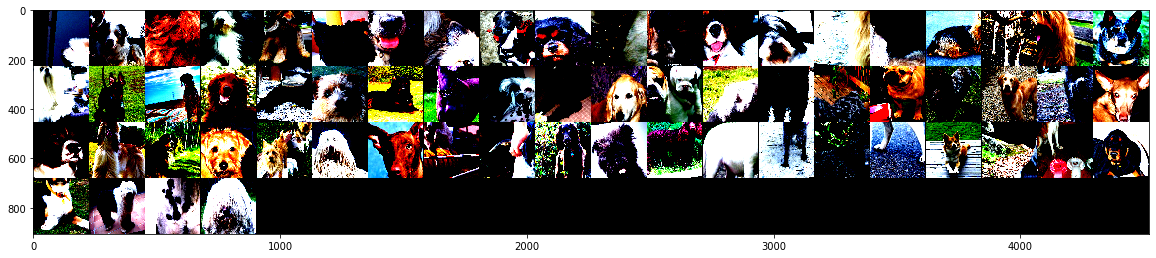

In [16]:
images, labels = next(iter(trainloader))

# Checking shape of image
print(f"Image shape : {images.shape}")
print(f"Label shape : {labels.shape}")

class_names = train_data.classes

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

# plotting the images of loaded batch with given fig size and frame data    
import torchvision
import matplotlib.pyplot as plt
import numpy as np
grid = torchvision.utils.make_grid(images, nrow = 20, padding = 2)
plt.figure(figsize = (20, 20))  
plt.imshow(np.transpose(grid, (1, 2, 0)))   
print('labels:', labels)

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:


# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # Convolutional layer sees 224*224*3
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)

        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (64 * 28 * 28 -> 500)
        self.fc1 = nn.Linear(64 * 28 * 28, 500)
        # linear layer (500 -> 133)
        self.fc2 = nn.Linear(500, 133)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        # flatten image input
        x = x.view(-1, 64 * 28 * 28)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu((self.fc1(x)))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [77]:
model_scratch

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

* First i wanted CNN layers and so used Conv2d for setting three layers of conv layers namely 
```
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
```
* since the images have 3 color channels, so in_channel of first conv layer namely conv1 will be "3" and then other channels and filter size are set by choosing arbitarily because they are hyperparameters and conv1 in_channel was data dependent parameter and so is last layer fc2 out_features as "133" due to 133 categories of dog breeds we want to classify.

* Now, in_features of fc1 also is data dependent parameter and hence choosen as depth set by out_channels of conv3 and height * width set by pooling.

* Pooling of window size 2*2 is used here to downsample the parameters otherwise training the network with much many parameters would require high computational complexity. So, after every convolutional layer and pooling , the dimensions height \* width is reduced by factor of 1/2.
Max Pooling is used here so that maximum number out of all calculated numbers in feature maps is chosen so as to select relevant features only.
```
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
```

* Dropout is used here to reduce overfitting as i saw the network tried to overfit the dataset very soon.
```
  (dropout): Dropout(p=0.5, inplace=False)
```

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [0]:
import torch.optim as optim


In [0]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [21]:
from google.colab import drive
drive.mount('/content/drive')
model_save_name = 'model_transfer.pt'
path = F"/content/drive/My Drive/{model_save_name}"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [0]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [0]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    print("Model training started...")
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # predicted outputs by passing inputs to the model
            output = model(data)
            # batch loss
            loss = criterion(output, target)
            # gradient of the loss with respect to model parameters
            loss.backward()
            # single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            if batch_idx % 50 == 0:
              print(f"epoch {epoch} batch : {batch_idx}")
            
        ######################    
        # validate the model #
        ######################
        print("validation started..")
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            # batch loss
            loss = criterion(output, target)
            # average validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), path)
            valid_loss_min = valid_loss
    # return trained model
    print("Training completed succesfully !")
    return model

In [0]:
# train the model
model_scratch = train(50, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Model training started...
epoch 1 batch : 0
epoch 1 batch : 50
epoch 1 batch : 100
validation started..
Epoch: 1 	Training Loss: 4.886731 	Validation Loss: 4.876176
Validation loss decreased (inf --> 4.876176).  Saving model ...
epoch 2 batch : 0
epoch 2 batch : 50
epoch 2 batch : 100
validation started..
Epoch: 2 	Training Loss: 4.874640 	Validation Loss: 4.854900
Validation loss decreased (4.876176 --> 4.854900).  Saving model ...
epoch 3 batch : 0
epoch 3 batch : 50
epoch 3 batch : 100
validation started..
Epoch: 3 	Training Loss: 4.864312 	Validation Loss: 4.845758
Validation loss decreased (4.854900 --> 4.845758).  Saving model ...
epoch 4 batch : 0
epoch 4 batch : 50
epoch 4 batch : 100
validation started..
Epoch: 4 	Training Loss: 4.851845 	Validation Loss: 4.823358
Validation loss decreased (4.845758 --> 4.823358).  Saving model ...
epoch 5 batch : 0
epoch 5 batch : 50
epoch 5 batch : 100
validation started..
Epoch: 5 	Training Loss: 4.837227 	Validation Loss: 4.793770
Validati

In [0]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load(path))

<All keys matched successfully>

In [0]:
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [0]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.969032


Test Accuracy: 11% (97/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [0]:
loaders_transfer = {
    'train': trainloader,
    'valid': validloader,
    'test': testloader
}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [26]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

for name,child in model_transfer.named_children():
  if name in ['layer4','fc']:
    print(name + 'is unfrozen')
    for param in child.parameters():
      param.requires_grad = True
  else:
    print(name + 'is frozen')
    for param in child.parameters():
      param.requires_grad = False

num_ftrs = model_transfer.fc.in_features 
out_ftrs = 133
  
model_transfer.fc = nn.Sequential(nn.Linear(num_ftrs, 512),nn.ReLU(),nn.Linear(512,out_ftrs))

if use_cuda:
    model_transfer = model_transfer.cuda()

conv1is frozen
bn1is frozen
reluis frozen
maxpoolis frozen
layer1is frozen
layer2is frozen
layer3is frozen
layer4is unfrozen
avgpoolis frozen
fcis unfrozen


In [27]:
model_transfer

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
* The main idea was simple : light weight model but higher accuracy
* So, i choose pretrained ```ResNet50``` which is not much heavy but gives higher accuracy if fine tuned properly !
* One of the reason was also that resnet models have already performed excellent in world level image classification challenges like ImageNet.
* ResNet 50 has ```"23.85" top - 1 error``` and ```"7.13" top - 5 error``` which is much less in relative to other models (although more heavy resnets are much better)
* Residual networks is based on theory that as we go deeper, we should make sure not to degrade accuracy and so,  Keep learning the residuals to match the predicted with the actual and this is acheived by mapping the identity function.
* This architechture contains ```(conv1)``` as first convolutional layer containing in channels as 3 which is due to RGB input tensor , ```(bn1)``` as batch normalization layer, followed by ```ReLU``` and ```MaxPooling``` and then it contains 4 main layers named ```layer1```, ```layer2```, ```layer3``` and ```layer4``` which contains further sub layers of convolution followed by batchnorm followed by relu followed by maxpooling , and then finally ```fc```.
* ```ReLU``` activation is used as it's the most proven activation function for classification problems as it introduces good and right amount of non linearity with less chances of vanishing gradient problem !
* ```Batch normalization``` helped in making the network more stable and learning faster thereby faster convergence.
* ```Maxpooling``` helped in downsampling high number of parameters created by producing higher dimensional feature maps after convolution operation and thus selecting only relevant features from the high dimensioned feature matrix.
* Then i replaced last layer of this architechture by fully connected layer containing two sub linear layers as follows :
```Linear(in_features=2048, out_features=512)```
```Linear(in_features=512, out_features=133)```
with ReLU activations between the linears.
* Now, the important thing is about unfrozing layers, so i choose to first only train ```layer4``` and ```fc``` and then i unfroze one more layer ```layer3``` which increased the accuracy and decreased the validation losses.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [0]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = torch.optim.SGD(filter(lambda p:p.requires_grad,model_transfer.parameters()) , lr = 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [0]:
n_epochs = 30
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Model training started...
epoch 1 batch : 0
epoch 1 batch : 50
epoch 1 batch : 100
validation started..
Epoch: 1 	Training Loss: 1.602312 	Validation Loss: 1.131011
Validation loss decreased (inf --> 1.131011).  Saving model ...
epoch 2 batch : 0
epoch 2 batch : 50
epoch 2 batch : 100
validation started..
Epoch: 2 	Training Loss: 1.570295 	Validation Loss: 1.067186
Validation loss decreased (1.131011 --> 1.067186).  Saving model ...
epoch 3 batch : 0
epoch 3 batch : 50
epoch 3 batch : 100
validation started..
Epoch: 3 	Training Loss: 1.564795 	Validation Loss: 1.021501
Validation loss decreased (1.067186 --> 1.021501).  Saving model ...
epoch 4 batch : 0
epoch 4 batch : 50
epoch 4 batch : 100
validation started..
Epoch: 4 	Training Loss: 1.523610 	Validation Loss: 1.017083
Validation loss decreased (1.021501 --> 1.017083).  Saving model ...
epoch 5 batch : 0
epoch 5 batch : 50
epoch 5 batch : 100
validation started..
Epoch: 5 	Training Loss: 1.506535 	Validation Loss: 1.013853
Validati

In [0]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load(path))

<All keys matched successfully>

In [0]:
for name,child in model_transfer.named_children():
  if name in ['layer3', 'layer4', 'fc']:
    print(name + 'is unfrozen')
    for param in child.parameters():
      param.requires_grad = True
  else:
    print(name + 'is frozen')
    for param in child.parameters():
      param.requires_grad = False

conv1is frozen
bn1is frozen
reluis frozen
maxpoolis frozen
layer1is frozen
layer2is frozen
layer3is unfrozen
layer4is unfrozen
avgpoolis frozen
fcis unfrozen


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [0]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.744496


Test Accuracy: 84% (709/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [0]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
import matplotlib.pyplot as plt
import matplotlib
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [str(name)[4:].replace("_", " ") for name in next(os.walk('dog_images/train/'))[1]]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    transform = transforms.Compose([transforms.Resize(256),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])
    file = img_path
    file = Image.open(file).convert('RGB')
    img = transform(file).unsqueeze(0)
    #print('Transforming your image...')
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model_transfer.eval()
    with torch.no_grad():
        #print('Passing your image to the model....')
        out = model_transfer(img.to(device))
        ps = torch.exp(out)
        top_p, top_class = ps.topk(1, dim=1)
        value = top_class.item()
        return class_names[value]

In [115]:
predict_breed_transfer(dog_files[500])

'Boykin spaniel'

In [0]:
def display_breed(file):
  file = Image.open(file).convert('RGB')
  plt.imshow(file)
  matplotlib.pyplot.text(5, -20, "Hello and welcome to Face Detector App !",
  color='black', fontsize=15)
  plt.show()

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](https://github.com/udacity/deep-learning-v2-pytorch/blob/master/project-dog-classification/images/sample_human_output.png?raw=1)


### (IMPLEMENTATION) Write your Algorithm

In [0]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if (dog_detector(img_path)):
      print("We think you are a dog !")
      breed_name = predict_breed_transfer(img_path)
      display_breed(img_path)
      print("Predicted breed is :", breed_name)
    elif (face_detector(img_path)):
      print("We think you are human !")
      breed_name_human = predict_breed_transfer(img_path)  
      display_breed(img_path)
      print("You most closely resemble with :", breed_name_human)
    else:
      print("We think you are neither human nor dog , might be a alien !")

We think you are human !


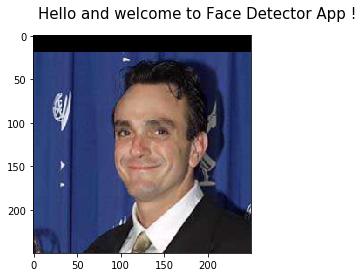

You most closely resemble with : Collie


In [124]:
run_app(human_files[500])

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)
* The output is not much good as expected as it is predicting sometimes wrong labels and this is due to network having not very high accuracy.

```Points for improvement``` :  

* We can try to introduce dropout or other regularization measures to avoid overfitting of model over the training dataset.

* We can try more appropriate hyperparameter tuning methods such as grid search to fine tune the hyperparameters of the models.

* We can check for gradient explosion problem by examining each layer's weights updates and analysing other metrics. Using Gradient clipping can help.

* We can try to reduce batch size as it has been sometimes, high batch size leads to loss of generalization (maybe we can try 8, 16.. etc..).

* We can also try to change weights initialization by using Xavier or He initialization because these can affect the learning process.


We think you are human !


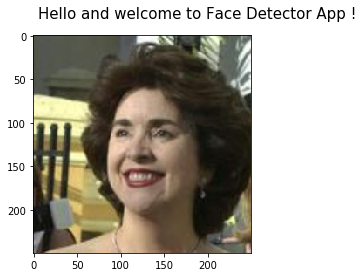

You most closely resemble with : Alaskan malamute

We think you are human !


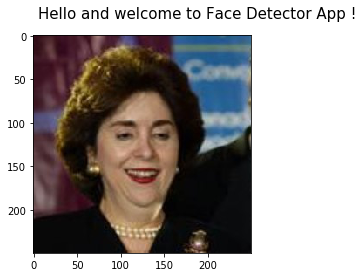

You most closely resemble with : Cavalier king charles spaniel

We think you are human !


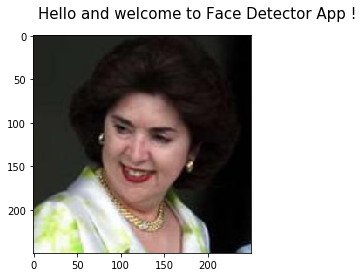

You most closely resemble with : Alaskan malamute

We think you are a dog !


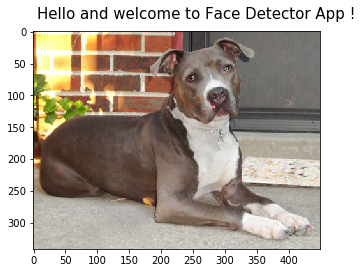

Predicted breed is : Collie

We think you are a dog !


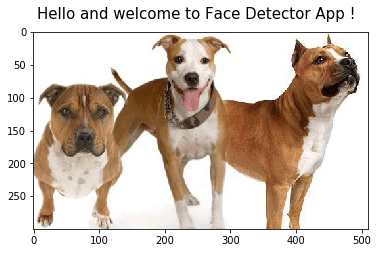

Predicted breed is : Collie

We think you are a dog !


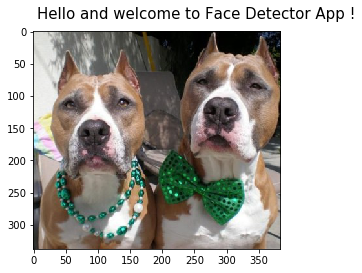

Predicted breed is : Collie



In [126]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)
    print()

### Testing on sample images 

We think you are human !


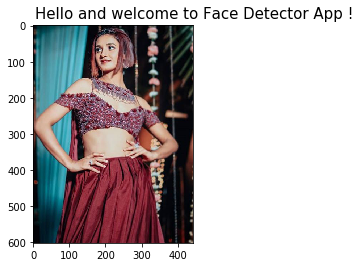

You most closely resemble with : Alaskan malamute


In [127]:
run_app("1.JPG")

We think you are human !


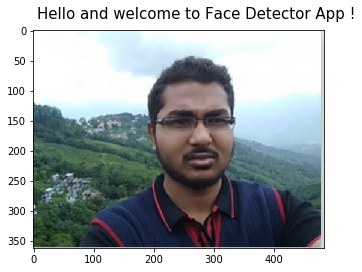

You most closely resemble with : Collie


In [128]:
run_app("2.JPG")

We think you are a dog !


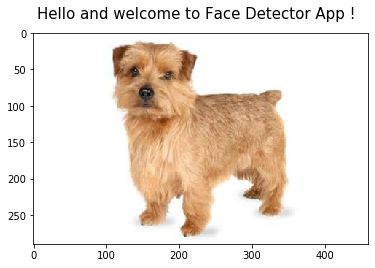

Predicted breed is : Pekingese


In [130]:
run_app("3.jpg")

We think you are a dog !


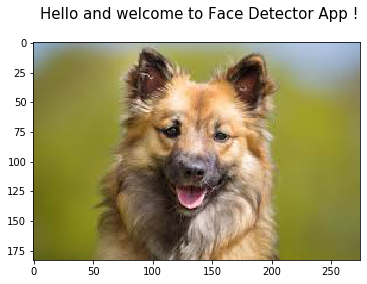

Predicted breed is : English springer spaniel


In [131]:
run_app("4.jfif")

### Some weird results !

We think you are human !


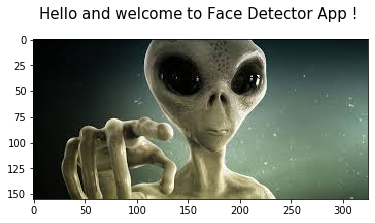

You most closely resemble with : Dogue de bordeaux


In [132]:
run_app("5.jfif")

We think you are human !


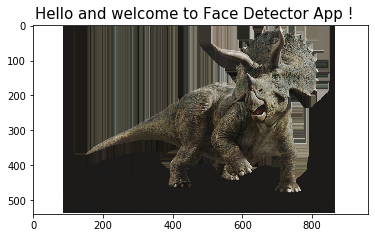

You most closely resemble with : Great pyrenees


In [133]:
run_app("6.png")